In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-annual-population-growth-1951-2020/world-population.csv


In [2]:
pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import plotly.io as pio
png_renderer = pio.renderers["png"]
png_renderer.width = 500
png_renderer.height = 500

In [4]:
import kaleido

In [5]:
import plotly.express as px 

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

**Data processing:**

In [7]:
df=pd.read_csv('/kaggle/input/global-annual-population-growth-1951-2020/world-population.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   year                         70 non-null     int64 
 1   population                   70 non-null     int64 
 2   yearly_growth_percentage     70 non-null     object
 3   yearly_growth                70 non-null     int64 
 4   pop_density_km2              70 non-null     int64 
 5   urban_population             70 non-null     int64 
 6   urban_population_percentage  70 non-null     object
dtypes: int64(5), object(2)
memory usage: 4.0+ KB


In [9]:
df['yearly_growth_percentage']=df['yearly_growth_percentage'].str.replace('%','')
df['yearly_growth_percentage']=df['yearly_growth_percentage'].astype('float')

In [10]:
df['urban_population_percentage']=df['urban_population_percentage'].str.replace('%','')
df['urban_population_percentage']=df['urban_population_percentage'].astype('float')

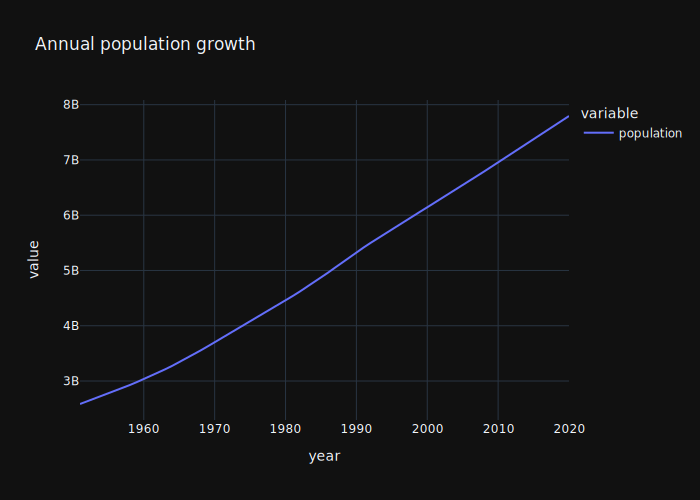

In [25]:
ppy=pd.pivot_table(df,index='year',values='population')
fig=px.line(ppy,title="Annual population growth",template='plotly_dark',)
fig.show(renderer="svg")


**Population has been increasing in the last 70 years**

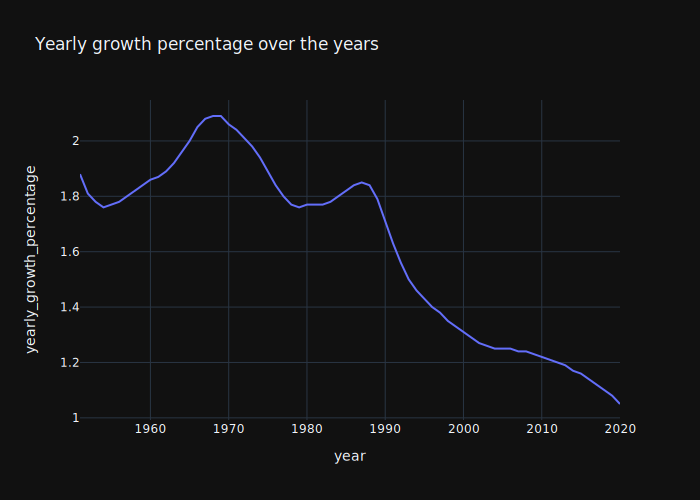

In [24]:
fig2=px.line(df,x='year',y='yearly_growth_percentage',template='plotly_dark',title="Yearly growth percentage over the years",)
fig2.show(renderer="svg")

**Yearly popualtion growth started to decline since 1969**

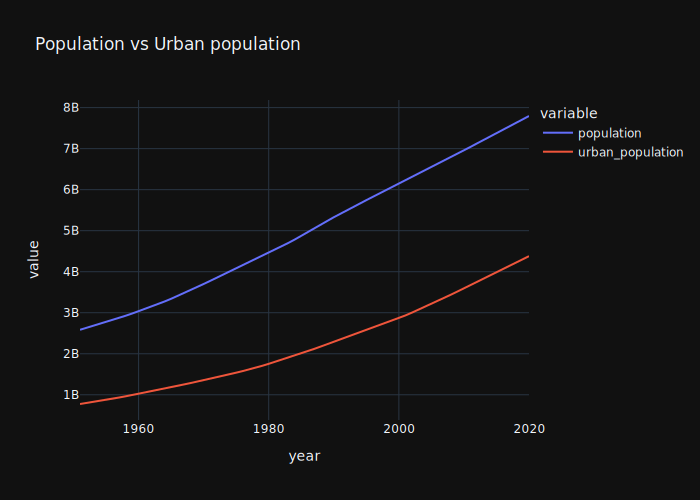

In [27]:
f3=px.line(df,x='year',y=['population','urban_population'],template='plotly_dark',title="Population vs Urban population",)
f3.show(renderer="svg")

**Population and Urban population are moving in the same trend.**

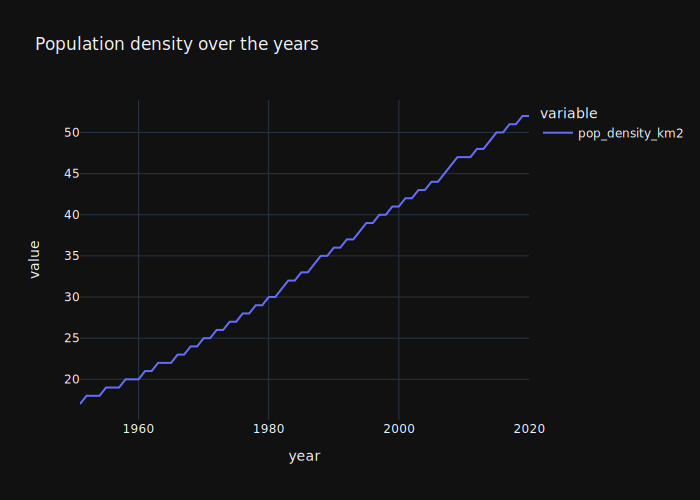

In [29]:
f4=px.line(df,x='year',y=['pop_density_km2'],template='plotly_dark',title="Population density over the years",)
f4.show(renderer="svg")

**Population density has increased over the years**

**Top years by yearly growth percentage:**

In [15]:
tgy=pd.pivot_table(df,index='year',values='yearly_growth_percentage')
tgy=tgy.sort_values(by='yearly_growth_percentage',ascending=False)
tgy=tgy.head(10)
tgy


,yearly_growth_percentage
year,
1969,2.09
1968,2.09
1967,2.08
1970,2.06
1966,2.05
1971,2.04
1972,2.01
1965,2.00
1973,1.98


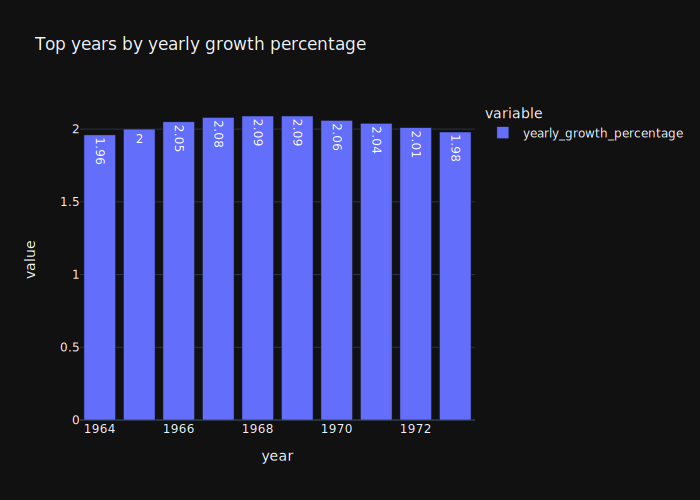

In [30]:
f5=px.bar(tgy,template='plotly_dark',title="Top years by yearly growth percentage",text_auto=True)
f5.show(renderer="svg")

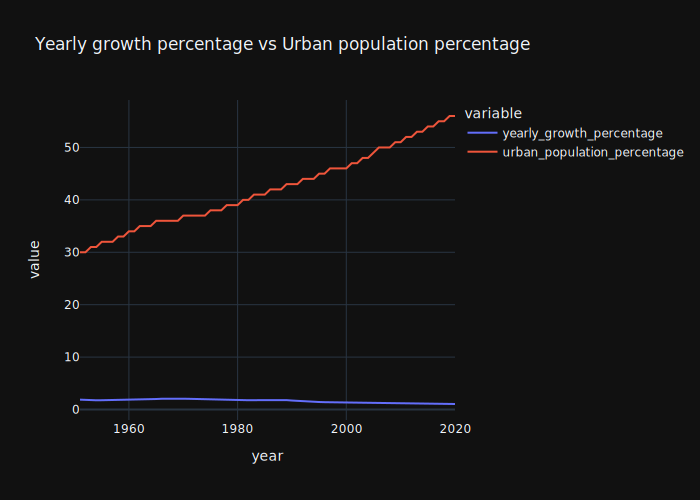

In [31]:
f6=px.line(df,x='year',y=['yearly_growth_percentage','urban_population_percentage'],template='plotly_dark',title="Yearly growth percentage vs Urban population percentage",)
f6.show(renderer="svg")

**Urban population percentage continued moving up while Yearly growth percentage started to decline**

**Data correlation:**

<AxesSubplot:>

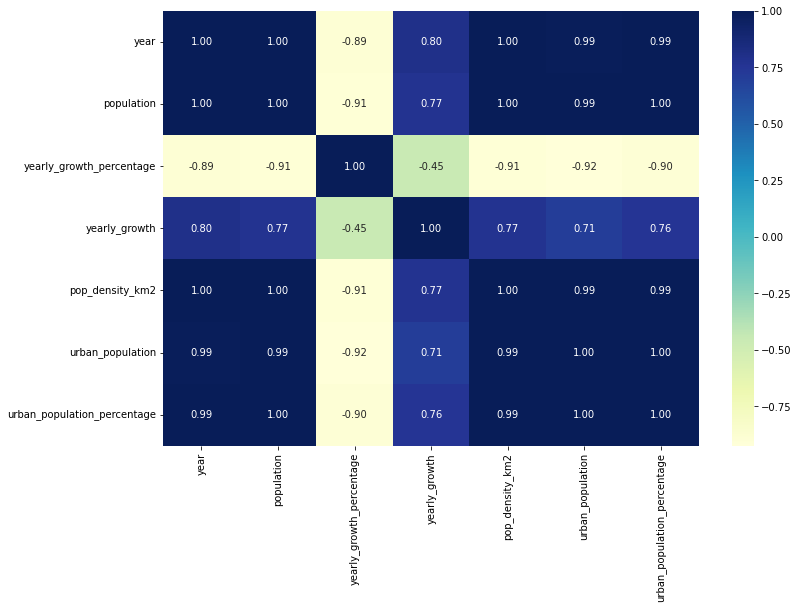

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')

**Most of the data variables are highly correlated with each others**